#Tópicos Avanzados de Computación II
##Dr. Carlos Villaseñor
##Lección 4 - Redes neuronales multicapa

A continuación la clase de la red neuronal de una capa (que se explicó en clase)

In [6]:
"""
Multilayer Perceptron
Dr. Carlos Villaseñor
"""

# Packages
import numpy as np

def linear(z, derivative=False):
    a = z
    if derivative:
        da = 1
        return a, da
    return a


def sigmoid(z, derivative=False):
    a = 1/(1+np.exp(-z))
    if derivative:
        da = a * (1 - a)
        return a, da
    return a


def tanh(z, derivative=False):
    a = np.tanh(z)
    if derivative:
        da = (1 - a) * (1 + a)
        return a, da
    return a


def relu(z, derivative=False):
    a = z * (z >= 0)
    if derivative:
        da = np.array(z >= 0, dtype=float)
        return a, da
    return a

class MLP:

    def __init__(self, layers_dims, 
                 hidden_activation=relu,
                 output_activation=sigmoid,
                 learning_rate=0.1):

        # Instance Attributes
        self.L = len(layers_dims) - 1
        self.w = [None] * (self.L + 1)
        self.b = [None] * (self.L + 1)
        self.f = [None] * (self.L + 1)
        self.layers = layers_dims
        self.eta = learning_rate

        # Initialize weights
        for l in range(1, self.L + 1):
            self.w[l] = -1 + 2 * np.random.rand(layers_dims[l], layers_dims[l-1])
            self.b[l] = -1 + 2 * np.random.rand(layers_dims[l], 1)
            
            if l == self.L:
                self.f[l] = output_activation
            else:
                self.f[l] = hidden_activation
                

    def predict(self, X):
        a = np.asanyarray(X)
        for l in range(1, self.L + 1):
            z = np.dot(self.w[l], a) + self.b[l]
            a = self.f[l](z)
        return a

    def fit(self, X, Y, epochs=100):

        # Number of samples
        P = X.shape[1]

        #Gradient Descent
        for _ in range(epochs):
            for p in range(P):

                # Initialize activations and their derivatives
                a = [None] * (self.L + 1)
                da = [None] * (self.L + 1)
                lg = [None] * (self.L + 1)
                
                # Propagation
                a[0] = X[:, p].reshape(self.layers[0], 1)
                for l in range(1, self.L + 1):
                    z = np.dot(self.w[l], a[l-1]) + self.b[l]
                    a[l], da[l] = self.f[l](z, derivative=True)

                # Backpropagation
                for l in range(self.L, 0, -1):
                    # Calculate local gradient (lg)
                    if l == self.L:
                        lg[l] = (Y[:, p] - a[l]) * da[l]
                    else:
                        lg[l] = np.dot(self.w[l + 1].T, lg[l+1]) * da[l]
                        
                # Update parameters
                for l in range(1, self.L + 1):
                    self.w[l] += self.eta * np.dot(lg[l], a[l - 1].T)
                    self.b[l] += self.eta * lg[l]

Para su actividad necesitarán esta función para dibujar

In [8]:
import matplotlib.pyplot as plt

def MLP_binary_classification_2d(X,Y,net):
    plt.figure()
    for i in range(X.shape[1]):
        if Y[0,i]==0:
            plt.plot(X[0,i], X[1,i], '.r')
        else:
            plt.plot(X[0,i], X[1,i], '.b')
    xmin, ymin=np.min(X[0,:])-0.5, np.min(X[1,:])-0.5
    xmax, ymax=np.max(X[0,:])+0.5, np.max(X[1,:])+0.5
    xx, yy = np.meshgrid(np.linspace(xmin,xmax,100), 
                         np.linspace(ymin,ymax,100))
    data = [xx.ravel(), yy.ravel()]
    zz = net.predict(data)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx,yy,zz, alpha=0.8, 
                 cmap=plt.cm.RdBu)
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid()
    plt.show()

Vamos a crear el dataset para el problema XOR

In [10]:
X = np.array([[0, 0, 1, 1],
              [0, 1, 0, 1]])
Y = np.array([[1, 0, 0, 1]]) 

Dibujemos primeramente que nos da la red neuronal sin entrenar

[[0.50770134 0.38376611 0.75332429 0.59184822]]


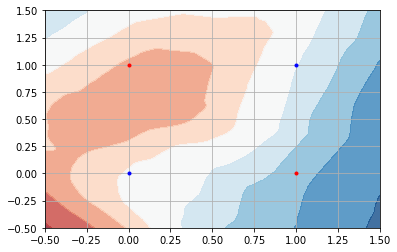

In [12]:
net = MLP((2,100,1), learning_rate=0.2)
print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)

Ahora vamos a entrenar!!

[[0.91827598 0.07622993 0.07743397 0.9291396 ]]


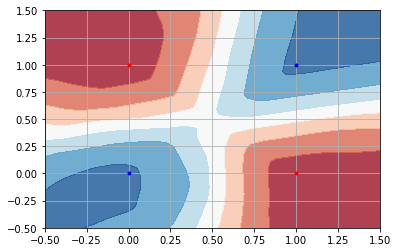

In [13]:
net.fit(X, Y)
print(net.predict(X))
MLP_binary_classification_2d(X,Y,net)